# What is Pittsburgh's Best Neighborhood? #

#### Group Members: Rachelle Atchina (rka32@pitt.edu), Zoe Holm (zch11@pitt.edu), Jiya Dugad (jnd69@pitt.edu) ####

Group Name: **Steel Sisters**

Data Sets:

  1. [Fires.csv](https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh/resource/8d76ac6b-5ae8-4428-82a4-043130d17b02)
  2. property.csv
  3. TREES.csv

**Metrics:**  Fires, Real Estate, Trees

When we set out on our journy to discover the best neighborhood in pittsburgh we narrowed our sights on metrics that would prove our neighborhood is safe, Good for business, and healthy. We would analyze data sets on these metrics to make sure our best neighborhood could be indentified.

# Fire #

By Rachelle Atchina

#### Certain Neighborhoods in Pittsbrgh experince a **LOT** more fires than others. ####
##### Fire related deaths have climbed steadly over the past 10 years with 13 deaths per million people in the US. (2022 According to usfa FEMA) #####

*https://www.usfa.fema.gov/statistics/deaths-injuries/*

##### All csv files and data can be found at #####
*https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh* 

###### The data used is from 2020. ######

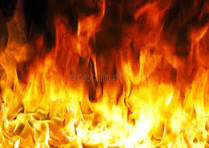

In [294]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [295]:
fires = pd.read_csv("Fires.csv")
fires.head(10)

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
5,6,F180021782,150.0,"Outside rubbish fire, Other","S 7TH ST & E CARSON ST, PITTSBURGH PA 15203",0,2018-03-12T09:13:28,231EN24,1702.0,South Side Flats,3.0,17.0,4.200317e+10,4.0,17.0,3.0,4-2,40.428618,-79.992239
6,7,F180022495,113.0,"Cooking fire, confined to container","200 BLOCK E OHIO ST, PITTSBURGH PA 15212",1,2018-03-14T19:46:10,231EN32,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453022,-80.003660
7,8,F180022546,111.0,Building fire,"7000 BLOCK LEMINGTON AVE, PITTSBURGH PA 15206",1,2018-03-14T23:49:22,231EN15,1203.0,Lincoln-Lemington-Belmar,9.0,12.0,4.200312e+10,2.0,12.0,5.0,3-18,40.471358,-79.898240
8,9,F180022773,111.0,Building fire,"100 BLOCK SPENCER AVE, PITTSBURGH PA 15227",1,2018-03-15T20:39:05,231EN23,2904.0,Carrick,4.0,29.0,4.200329e+10,4.0,29.0,3.0,4-15,40.385494,-79.977200
9,10,F170044316,131.0,Passenger vehicle fire,"1200 BLOCK WESTFIELD ST, PITTSBURGH PA 15216",0,2017-06-03T01:31:13,231EN28,1916.0,Beechview,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-28,40.415219,-80.019516


#### First, I wanted to sort the different neighborhoods and count how many fires they each have had. Some of the data had NaN as their neighborhood, so I excluded that data as it would not be helpful. ####

In [297]:
fire_counts = fires["neighborhood"].value_counts(dropna=True)
print(fire_counts)

neighborhood
Carrick                      307
Central Business District    290
South Side Flats             289
Squirrel Hill South          268
Hazelwood                    257
                            ... 
Ridgemont                     12
Mt. Oliver                    12
East Carnegie                 11
Regent Square                  9
Mount Oliver Borough           6
Name: count, Length: 91, dtype: int64


#### Next I filtered based on areas that had less than 40 fires, and got our top 25 best neighborhoods on fires. ####

In [299]:
filtered_counts = fire_counts[fire_counts < 40]
print(filtered_counts)

neighborhood
Polish Hill             39
Morningside             35
Friendship              33
Westwood                28
Spring Garden           26
South Shore             26
Fairywood               26
Windgap                 24
Hays                    24
Esplen                  23
West End                23
New Homestead           22
Bon Air                 22
Summer Hill             21
Glen Hazel              20
Chartiers City          18
Swisshelm Park          17
St. Clair               14
Arlington Heights       13
Oakwood                 13
Ridgemont               12
Mt. Oliver              12
East Carnegie           11
Regent Square            9
Mount Oliver Borough     6
Name: count, dtype: int64


#### Next, let's create a graph displaying the top neighborhoods on safety from fires. ####

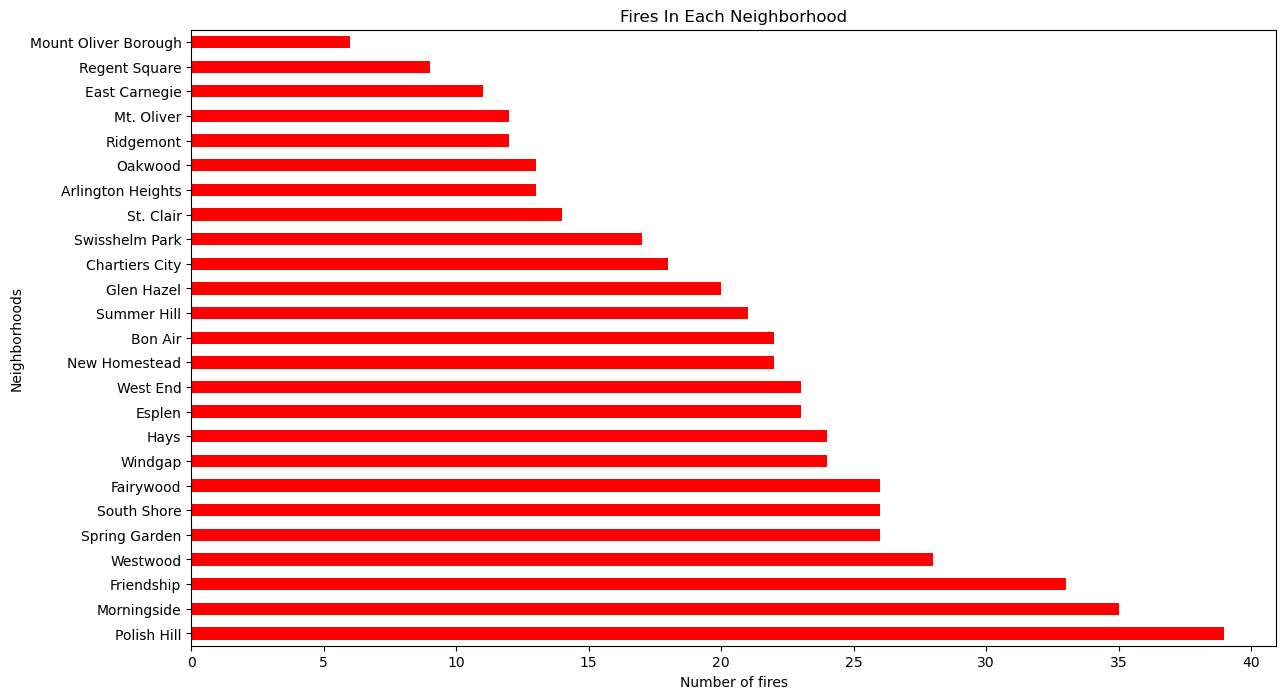

In [301]:
filtered_counts.plot(kind = "barh", x= 'fires', y = 'neighborhood', color = 'red')
plt.xlabel("Number of fires")
plt.ylabel("Neighborhoods")
plt.title("Fires In Each Neighborhood")
plt.show()

#### And just because it is visually appealing I wanted to create a map version so we could easily see where the best, safest from a fire, location is in Pittsburgh! #### 
1. First I clean up the dataset so it is just the neighborhoods and the longitude and latitude.

In [303]:
fires_cleaned = fires[['neighborhood', 'latitude', 'longitude']]
fires_cleaned.head()

,neighborhood,latitude,longitude
0,NaN,40.441275,-79.882485
1,NaN,40.436342,-79.881003
2,NaN,NaN,NaN
3,Fineview,40.460303,-80.006980
4,Fairywood,40.449009,-80.076607


#### You need geopandas to do these types of graphs so I load that in ####

In [305]:
import geopandas as gpd
import matplotlib.pyplot as plt
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")

In [306]:
# Clean fires data
fires_cleaned = fires_cleaned.dropna(subset=['longitude', 'latitude'])

# Create a GeoDataFrame for fires
gdf_fires = gpd.GeoDataFrame(
    fires_cleaned,
    geometry=gpd.points_from_xy(fires_cleaned['longitude'], fires_cleaned['latitude']),
    crs="EPSG:4326"
)

In [307]:
# Count fires by neighborhood
fire_counts = fires_cleaned.groupby('neighborhood').size().reset_index(name='number_of_fires')

# Merge fire counts into neighborhoods
fire_map = neighborhoods.merge(fire_counts, how='left', left_on='hood', right_on='neighborhood')

# Inspect the result
fire_map[['hood', 'number_of_fires', 'geometry']].head()

,hood,number_of_fires,geometry
0,Central Oakland,96,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,132,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,64,"POLYGON ((-79.9623 40.44294, -79.9622 40.44289..."
3,Crawford-Roberts,113,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,75,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


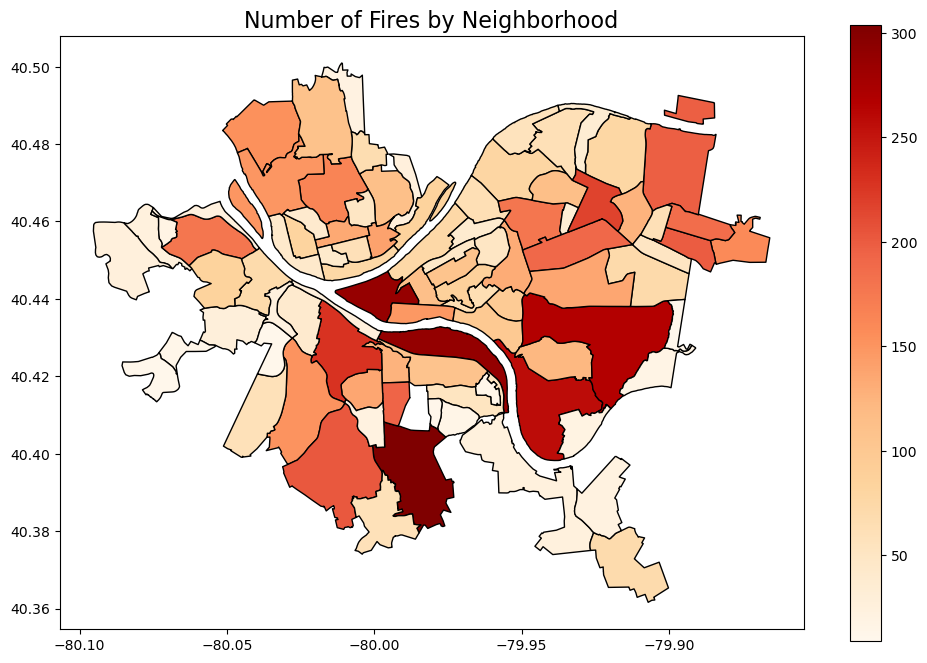

In [308]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
fire_map.plot(
    column='number_of_fires', 
    cmap='OrRd',
    legend=True,
    edgecolor='black'
)
plt.title("Number of Fires by Neighborhood", fontsize=16)
plt.show()

# City Owned Properties #

By Jiya Dugad

#### All of the best neighborhoods arround the country have some sort of city owned properties such as parking lots and parks.

##### Firstly I counted how many city owned properties did each of the neighborhood have.

In [313]:
property=pd.read_csv("property.csv")
property.head(10)
prop_counts=property["neighborhood_name"].value_counts(dropna=True)
print(prop_counts)

neighborhood_name
Hazelwood              427
Perry South            407
Larimer                404
Homewood North         399
Homewood South         344
                      ... 
South Shore              2
Oakwood                  1
Lower Lawrenceville      1
Allegheny Center         1
Glen Hazel               1
Name: count, Length: 82, dtype: int64


##### I searched up few of the best neighborhoods in the States and then checkecked how many city owned property each had. It ranged to about 10-30 properties with an average of 27.
here are few of the links:

https://www.nyc.gov/site/planning/about/publications.page

https://www.miamidade.gov/apps/ISD/RealEstate_Portal/CountyOwnedProperties

https://www.mass.gov/commonwealth-owned-real-estate

In [315]:
filter_counts = prop_counts[(prop_counts > 10) & (prop_counts < 30)]
print(filter_counts)

neighborhood_name
St. Clair              28
Beechview              28
West End               25
Esplen                 23
Stanton Heights        21
Bedford Dwellings      19
Mount Washington       19
Bluff                  19
Arlington              18
Greenfield             18
Westwood               17
Overbrook              16
Upper Lawrenceville    16
Morningside            13
Ridgemont              13
Squirrel Hill South    11
Name: count, dtype: int64


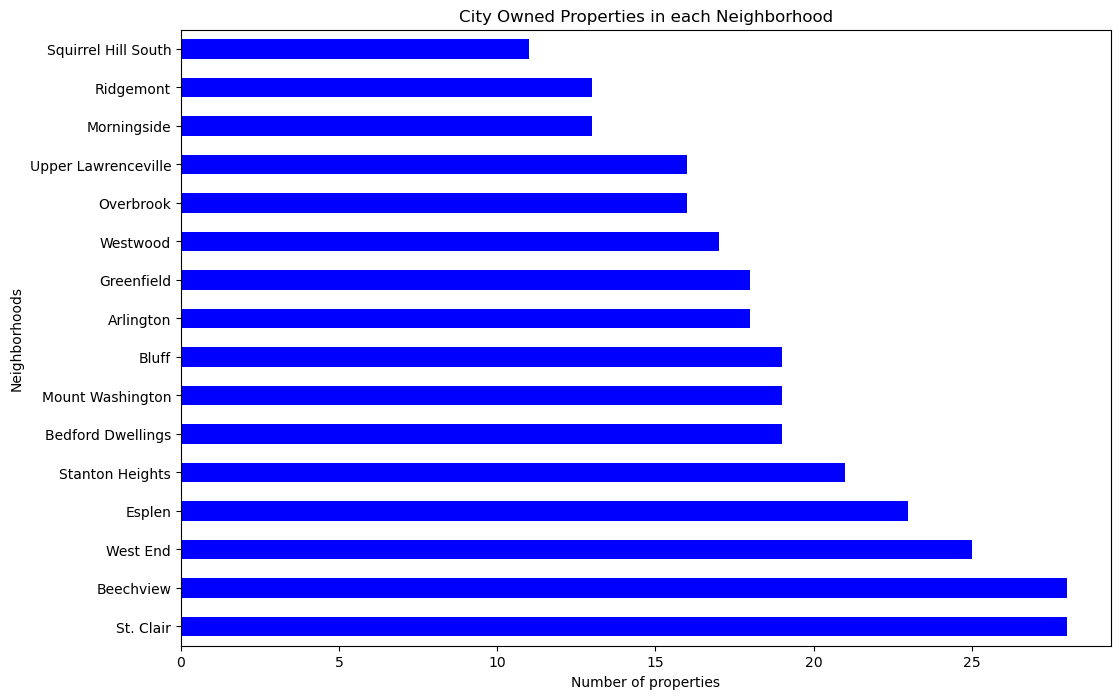

In [316]:
filter_counts.plot(kind="barh",x='property',y='neighborhood_name', color='blue')
plt.xlabel("Number of properties")
plt.ylabel("Neighborhoods")
plt.title("City Owned Properties in each Neighborhood")
plt.show()

# Tree Count #

This analysis determines the best neighborhood in Pittsburgh based on the total number of trees. Each row in the dataset represents an individual tree, and we aggregate the data to count trees per neighborhood. The process includes:

Loading and inspecting the dataset.
Counting trees per neighborhood.
Visualizing the results using a bar chart.
Concluding which neighborhood is the best. etric.

## Step 1: Load the Dataset

We load the dataset to examine its structure and identify relevant columns for our analysis.

In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the dataset
tree = pd.read_csv("TREE.csv", dtype={2: str})

# Display the first few rows to inspect
tree.head(10)

# Standardize column names
tree.columns = tree.columns.str.strip()
tree.columns = tree.columns.str.lower()


# Print column names to verify
print(tree.columns)


Index(['_id', 'id', 'address_number', 'street', 'common_name',
       'scientific_name', 'height', 'width', 'growth_space_length',
       'growth_space_width', 'growth_space_type', 'diameter_base_height',
       'stems', 'overhead_utilities', 'land_use', 'condition',
       'stormwater_benefits_dollar_value', 'stormwater_benefits_runoff_elim',
       'property_value_benefits_dollarvalue',
       'property_value_benefits_leaf_surface_area',
       'energy_benefits_electricity_dollar_value',
       'energy_benefits_gas_dollar_value',
       'air_quality_benfits_o3dep_dollar_value',
       'air_quality_benfits_o3dep_lbs',
       'air_quality_benfits_vocavd_dollar_value',
       'air_quality_benfits_vocavd_lbs',
       'air_quality_benfits_no2dep_dollar_value',
       'air_quality_benfits_no2dep_lbs',
       'air_quality_benfits_no2avd_dollar_value',
       'air_quality_benfits_no2avd_lbs',
       'air_quality_benfits_so2dep_dollar_value',
       'air_quality_benfits_so2dep_lbs',
       'a

## Step 2: Count Trees by Neighborhood

We aggregate the data to count the number of trees in each neighborhood. 
This will form the basis for determining the "best neighborhood."
c.


In [333]:
# Count the number of trees in each neighborhood
tree_counts = tree['neighborhood'].value_counts().reset_index()

# Rename columns for clarity and consistency
tree_counts.columns = ['Neighborhood', 'Tree Count']

## Step 3: Visualization – Bar Chart

A bar chart provides a clear comparison of the number of trees across neighborhoods.
.
s.


<Figure size 1400x800 with 0 Axes>

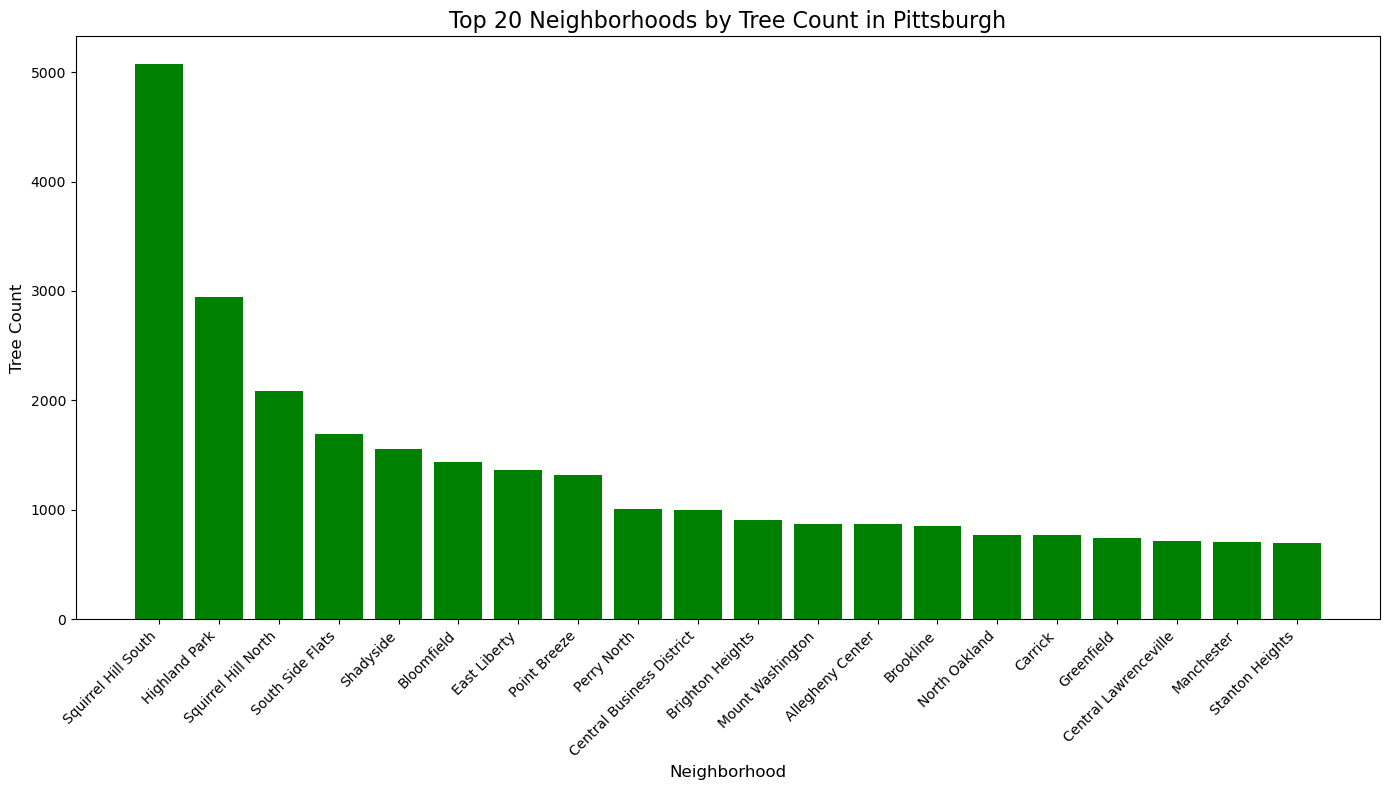

In [335]:
# Sort neighborhoods by tree count
neighborhood_trees_sorted = tree_counts.sort_values(by='Tree Count', ascending=False).head(20)

# Create the bar chart
plt.figure(figsize=(14, 8))
plt.bar(neighborhood_trees_sorted['Neighborhood'], neighborhood_trees_sorted['Tree Count'], color='green')
plt.title("Top 20 Neighborhoods by Tree Count in Pittsburgh", fontsize=16)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Tree Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Conclusion #

To combine all of our data to see the best neighborhood is not the easiest task. Beasue we wat to see the lowest fires, highest trees, and properties between 10-30 each metric and evaluated entirely differently. We needed to re-sort the data into the top 50 of each, see if there is any overlap between each of the three metrics and pick our winner!

In [364]:
# Count the number of fires in each neighborhood
fire_counts = fires["neighborhood"].value_counts(dropna=True)
if isinstance(fire_counts, pd.Series):
    fire_counts = fire_counts.to_frame()  # Convert Series to DataFrame
fire_counts_df = fire_counts.reset_index()  # This should give a DataFrame with two columns
fire_counts_df.columns = ['Neighborhood', 'Fire Count']  # Renaming columns

# Count the number of properties in each neighborhood
prop_counts = property["neighborhood_name"].value_counts(dropna=True)
prop_counts_df = prop_counts.reset_index()
prop_counts_df.columns = ['Neighborhood', 'Property Count']

# Count the number of trees in each neighborhood
tree_counts = tree['neighborhood'].value_counts(dropna=True).reset_index()
tree_counts.columns = ['Neighborhood', 'Tree Count'] 

# Step 1: Filter the datasets
# Convert 'Tree Count' column to numeric, forcing errors to NaN
tree_counts['Tree Count'] = pd.to_numeric(tree_counts['Tree Count'], errors='coerce')

# Filtering for top tree counts, lowest fire counts, and specific property count ranges
trees_filtered = tree_counts.nlargest(50, 'Tree Count')  # Top 50 neighborhoods with highest tree counts
fires_filtered = fire_counts_df.nsmallest(50, 'Fire Count')  # Top 50 neighborhoods with lowest fire counts
props_filtered = prop_counts_df[(prop_counts_df['Property Count'] >= 10) & (prop_counts_df['Property Count'] <= 30)]

# Step 2: Find overlapping neighborhoods
overlapping_neighborhoods = (
    set(trees_filtered['Neighborhood']) &
    set(fires_filtered['Neighborhood']) &
    set(props_filtered['Neighborhood'])
)

In [366]:
# Step 3: Merge the filtered data for overlapping neighborhoods
print(fire_counts_df.columns)

# Filter the datasets using the list of overlapping neighborhoods
filtered_trees = tree_counts[tree_counts['Neighborhood'].isin(overlapping_neighborhoods)]
filtered_fires = fire_counts_df[fire_counts_df['Neighborhood'].isin(overlapping_neighborhoods)]  # Ensure you're using fire_counts_df here
filtered_props = prop_counts_df[prop_counts_df['Neighborhood'].isin(overlapping_neighborhoods)]  # Use prop_counts_df here

# Optional: Check the results of the filtering
print(filtered_trees.head())
print(filtered_fires.head())
print(filtered_props.head())

Index(['Neighborhood', 'Fire Count'], dtype='object')
           Neighborhood  Tree Count
19      Stanton Heights         700
31          Morningside         461
41  Upper Lawrenceville         373
49            Overbrook         275
           Neighborhood  Fire Count
53      Stanton Heights          62
54            Overbrook          61
56  Upper Lawrenceville          56
67          Morningside          35
           Neighborhood  Property Count
42      Stanton Heights              21
49            Overbrook              16
50  Upper Lawrenceville              16
51          Morningside              13


The data shows that out of the 4 neighborhoods that appear in the top 50 of each data set, Stanton Hieghts is the best nighborhood. Lets veiw this data as a side-by-side bar graph.

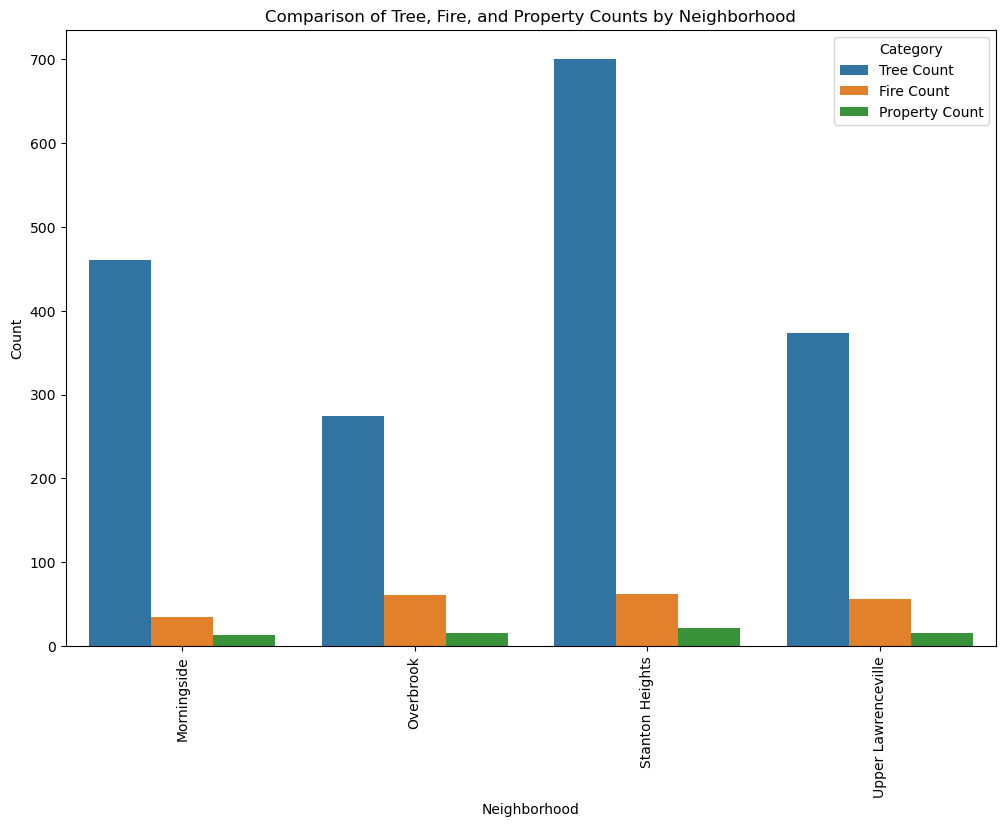

In [369]:
import seaborn as sns

# Create a DataFrame to combine the data
combined_data = pd.merge(filtered_trees[['Neighborhood', 'Tree Count']],
                         filtered_fires[['Neighborhood', 'Fire Count']], on='Neighborhood', how='outer')
combined_data = pd.merge(combined_data, filtered_props[['Neighborhood', 'Property Count']], on='Neighborhood', how='outer')

# Melt the DataFrame for easier plotting
combined_data_melted = combined_data.melt(id_vars='Neighborhood', value_vars=['Tree Count', 'Fire Count', 'Property Count'],
                                          var_name='Category', value_name='Count')

# Plot the combined data as a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Neighborhood', y='Count', hue='Category', data=combined_data_melted)
plt.title('Comparison of Tree, Fire, and Property Counts by Neighborhood')
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.show()

## Conclusion ##

The best neightberhood in Pittsburgh based on our metrics is **Stanton Heights**. Compared to the other options, the amount of fires in on par with the rest, and so is the real estate, but Stanton Hieghts has the highest count for trees! They has a total of 21 properties 62 fires and 700 trees.

## Reflection ##

Zoe - I wasn't super suprised. While Stanton Heights isn't known for much it is mostly just houses, which explains most of the data. 

Rachelle - I am not from Pittsburgh and my first time here was when I moved in just a couple of monts agp. I know very little about the neighborhoods, so I had no preconceptions on which neighborhood I thought was the best. I trust our data so Stanton Heights is it!

Jiya - I am also orignally not from Pittsburgh due to which I had little to no information about the Pittsburgh neighborhoods prior to this project. Given the data and the reasoning and research behind it, Stanton Heights the one!